# Loader

This is where your urban data journey begins. Whether you’ve got `CSV`, `Parquet`, `Shapefiles`, or want to use `HuggingFace` datasets we’ll get them loaded up and ready to explore. UrbanMapper provides two main ways to load data:

1. **Manual Loading of Local Datasets**: You can load datasets available locally in various formats like `CSV`, `Parquet`, and `Shapefiles`. This is the default approach for working with your own data.
2. **Integration with Hugging Face Dataset Library**: UrbanMapper also supports loading datasets from the Hugging Face library via the `from_dataframe()` method. This broadens the possibilities for integrating external data sources seamlessly.

**Data source used**:
- PLUTO data from NYC Open Data. https://www.nyc.gov/content/planning/pages/resources/datasets/mappluto-pluto-change
- Taxi data from NYC Open Data. https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

- **The OSCUR Hugging Face Dataset Source:**
The [OSCUR Hugging Face organization](https://huggingface.co/oscur)
 hosts all datasets associated with [OSCUR](https://oscur.org/): Open-Source Cyberinfrastructure for Urban Computing, a research initiative focused on enabling reproducible, scalable, and accessible data-driven analysis for urban environments.
By using the OSCUR datasets, you can skip downloading datasets from Google Drive or official links locally. These datasets are ready to use in all subsequent notebook examples without issue, making your workflow more efficient and seamless.



Ready? Let’s dive in! 🚀

In [ ]:
import urban_mapper as um

# Start up UrbanMapper
mapper = um.UrbanMapper()

## Loading CSV Data

First up, let’s load a CSV file with PLUTO data. We’ll tell UrbanMapper where to find the longitude and latitude columns so it knows what’s what and can make sure those colums are well formatted prior any analysis.

Note that below we employ a given csv, but you can put your own path, try it out!

In [ ]:
csv_loader = (
    mapper
    .loader # From the loader module
    .from_file("pluto_25v1_1.csv") # To update with your own path
    .with_columns(longitude_column="longitude", latitude_column="latitude") # Inform your long and lat columns
)

gdf = csv_loader.load() # Load the data and create a geodataframe's instance

print(csv_loader.preview())
# gdf stands for GeoDataFrame, like df in pandas for dataframes.
gdf


## Loading Parquet Data

Next, let's grab a `parquet` based dataset for the example. Same workflow as for the csv.

In [ ]:
parquet_loader = (
    mapper.
    loader. # From the loader module
    from_file("<path_to>/taxisvis5M.parquet") # To update with your own path
    .with_columns("pickup_longitude", "pickup_latitude") # Inform your long and lat columns
)

gdf = parquet_loader.load() # Load the data and create a geodataframe's instance

gdf

## Loading Shapefile Data

Finally, let’s load a Shapefile-based dataset. Shapefiles have geometry built in, so no need to specify columns — UrbanMapper sorts it out for us!

In [ ]:
shp_loader = (
    mapper
    .loader # From the loader module
    .from_file("<path_to>/MapPLUTO.shp") # To update with your own path
)

gdf = shp_loader.load() # Load the data and create a geodataframe's instance

gdf

## Loading Raster Data (V1)



Let's load Raster Data. This version of the loader return a nparray 3D which contains all the data of the raster. (not only the first band) 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


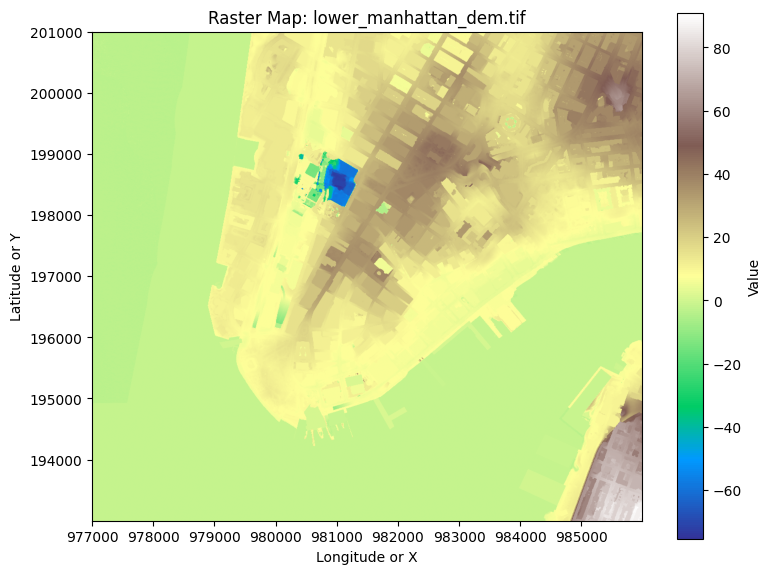

In [5]:
%load_ext autoreload
%autoreload 2

import urban_mapper as um
import matplotlib.pyplot as plt


# Start up UrbanMapper
mapper = um.UrbanMapper()

rst_loader = (
    mapper
    .loader # From the loader module
    .from_file("../../src/urban_mapper/modules/loader/tests/data/lower_manhattan_dem.tif") # To update with your own path
)

rst = rst_loader.load() # Load the data and create a 3D nparray, metadata and bounds instances.

    
meta = rst_loader._instance.meta
bounds = rst_loader._instance.bounds
data = rst[0]

nodata = meta.get('nodata', None)

nrows, ncols = data.shape
sample_size = 1000 #to update with your wanted resolution 
# downsampling ste
row_step = max(1, nrows // sample_size) 
col_step = max(1, ncols // sample_size)
data_sample = data[::row_step, ::col_step]
# In case of not None nodata 
if nodata is not None:
    data_sample = np.where(data_sample == nodata, np.nan, data_sample)
extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

plt.figure(figsize=(8, 6))
im = plt.imshow(data_sample, cmap='terrain', extent=extent, origin='upper', aspect='equal')
plt.title("Raster Map: lower_manhattan_dem.tif") # to update with you own path
plt.xlabel("Longitude or X")
plt.ylabel("Latitude or Y")
plt.colorbar(im, label='Value')
plt.tight_layout()
plt.show()


## Loading Raster Data (V2)



Let's load Raster Data. This version of the loader return a GDF. (WIP doesn't work for the moment). DownSampled method.


In [9]:
%load_ext autoreload
%autoreload 2

import urban_mapper as um

# Start up UrbanMapper
mapper = um.UrbanMapper()

rst_loader = (
    mapper
    .loader # From the loader module
    .from_file("../../src/urban_mapper/modules/loader/tests/data/lower_manhattan_dem.tif") # To update with your own path
)

gdf = rst_loader.load() # Load the data and create a geodataframe's instance

gdf 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,pixel_id,row,col,area,value,latitude,longitude,geometry
0,0,0,0,100.0,-2.583589,40.718359,-74.026137,"POLYGON ((976999.3 201000.675, 977010.3 201000..."
1,1,0,1,100.0,-3.220933,40.718359,-74.026101,"POLYGON ((977009.3 201000.675, 977020.3 201000..."
2,2,0,2,100.0,-3.506755,40.718359,-74.026065,"POLYGON ((977019.3 201000.675, 977030.3 201000..."
3,3,0,3,100.0,-3.576644,40.718359,-74.026028,"POLYGON ((977029.3 201000.675, 977040.3 201000..."
4,4,0,4,100.0,-3.501456,40.718359,-74.025992,"POLYGON ((977039.3 201000.675, 977050.3 201000..."
...,...,...,...,...,...,...,...,...
719995,719995,799,895,100.0,87.045921,40.696431,-73.993852,"POLYGON ((985949.3 193010.675, 985960.3 193010..."
719996,719996,799,896,100.0,86.394310,40.696431,-73.993816,"POLYGON ((985959.3 193010.675, 985970.3 193010..."
719997,719997,799,897,100.0,86.507019,40.696431,-73.993780,"POLYGON ((985969.3 193010.675, 985980.3 193010..."
719998,719998,799,898,100.0,86.507019,40.696431,-73.993744,"POLYGON ((985979.3 193010.675, 985990.3 193010..."


## Loading Data from Hugging Face

UrbanMapper provides two ways to load datasets from Hugging Face:

1. **Using `from_dataframe()`**: This method allows you to load a dataset into a pandas DataFrame first, giving you flexibility to preprocess or explore the data before loading it into UrbanMapper.
2. **Using `from_huggingface()`**: This method directly loads the dataset into UrbanMapper, skipping the intermediate DataFrame step for simplicity.

### Method 1: Using `from_dataframe()`

This code loads the "oscur/pluto" dataset from Hugging Face, selects the training split, and converts the first 1,000 rows into a pandas DataFrame for efficient analysis and exploration. The resulting DataFrame can then be loaded into UrbanMapper using `from_dataframe()`.

In [ ]:
from datasets import load_dataset, Dataset
import pandas as pd

# Retrieve the dataset from Hugging Face
dataset = load_dataset("oscur/pluto")
# Select the training split
train_ds = dataset["train"]
# Convert the first 1000 rows to a DataFrame
df = pd.DataFrame(train_ds[:1000])

# Load the dataset using UrbanMapper
df_loader = (
    mapper
    .loader # From the loader module
    .from_dataframe(df) # To update with your dataframe
    .with_columns(longitude_column="longitude", latitude_column="latitude") # Inform your long and lat columns
)

gdf = df_loader.load() # Load the data and create a geodataframe's instance

# gdf stands for GeoDataFrame, like df in pandas for dataframes.
gdf

### Method 2: Using `from_huggingface()`

This method directly loads the "oscur/pluto" dataset into UrbanMapper, skipping the intermediate DataFrame step. It's a simpler and faster way to load datasets hosted on Hugging Face.

In [ ]:
# Load a full dataset directly from Hugging Face
loader = mapper.loader.from_huggingface("oscur/pluto", number_of_rows=100).with_columns(longitude_column="longitude", latitude_column="latitude")
gdf = loader.load()
gdf  # Next steps: analyze or visualize the data

## Be Able To Preview Your Loader's instance

Additionally, you can preview your loader's instance to see what columns you've specified and the file path you've loaded from. Pretty useful when you load a urban analysis shared by someone else and might want to check what columns are being used for the analysis.

In [ ]:
print(gdf.preview())

### Loading many datasets to feed and end-to-end UrbanMapper process (step-by-step or pipeline)

In [ ]:
# Load datasets directly from Hugging Face
pluto_data = mapper.loader.from_huggingface("oscur/pluto", number_of_rows=100).with_columns(longitude_column="longitude", latitude_column="latitude").load()
taxi_data =  (
  mapper
  .loader
  .from_huggingface("oscur/taxisvis1M", number_of_rows=100)
  .with_columns(longitude_column="pickup_longitude", latitude_column="pickup_latitude")
  .with_map({"pickup_longitude": "longitude", "pickup_latitude": "latitude"}) ## Routines like layer.map_nearest_layer needs datasets with the same longitude_column and latitude_column
  .load()
)
## ... load any other dataset

data = {
  "pluto_data": pluto_data,
  "taxi_data": taxi_data,
  ## ... add any other dataset
}

## Invoke any other UrbanMapper module passing data as parameter

## Wrapping Up

And that’s that! 🎈 You’ve loaded data from four different formats like a pro: `CSV`, `Parquet`, `Shapefile`, and datasets from Hugging Face. Now you’re all set to play with modules like `urban_layer` or `imputer`.